## Datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## PS2 - What day of the week was 1/1/1970

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


myArray = np.array([1,2,3,4,5,6,7])
print(myArray)
mySeries = pd.Series(myArray)
print(mySeries)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
print(mySeries)
mySeries.index.dayofweek
mySeries.index.day_name()[0]

[1 2 3 4 5 6 7]
0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64
1970-01-01    1
1970-01-02    2
1970-01-03    3
1970-01-04    4
1970-01-05    5
1970-01-06    6
1970-01-07    7
Freq: D, dtype: int64


'Thursday'

## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [2]:

ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [3]:
def find_day(x):
    return x.day_name()

In [4]:
ufo['Day'] = ufo['Time'].map(find_day)

In [5]:
ufo['Day'].value_counts()

Tuesday      2822
Sunday       2689
Saturday     2687
Friday       2669
Thursday     2598
Wednesday    2476
Monday       2300
Name: Day, dtype: int64

#### Tuesday is the day of the week with the most UFO sightings reported.

In [6]:
def find_date(x):
    return x.date()

In [7]:
ufo['Date'] = ufo['Time'].map(find_date)

In [8]:
def find_time(x):
    return x.time()

In [9]:
ufo['TimeOfDay'] = ufo['Time'].map(find_time)

In [10]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Day,Date,TimeOfDay
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,1930-06-01,22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,1930-06-30,20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,1931-02-15,14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,1931-06-01,13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,1933-04-18,19:00:00


In [11]:
ufo['Date'].value_counts()

1999-11-16    187
1997-03-13     76
1997-07-04     69
1999-09-01     67
1999-08-15     47
             ... 
1961-06-20      1
1982-07-30      1
1972-10-05      1
1968-01-20      1
1969-06-21      1
Name: Date, Length: 5576, dtype: int64

In [12]:
ufo['Date'] = ufo['Date'].astype(str)

In [13]:
most_sightings = ufo[ufo['Date'] == '1999-11-16']

In [14]:
second_most_sightings = ufo[ufo['Date'] == '1997-03-13']

Day with the most sightings:

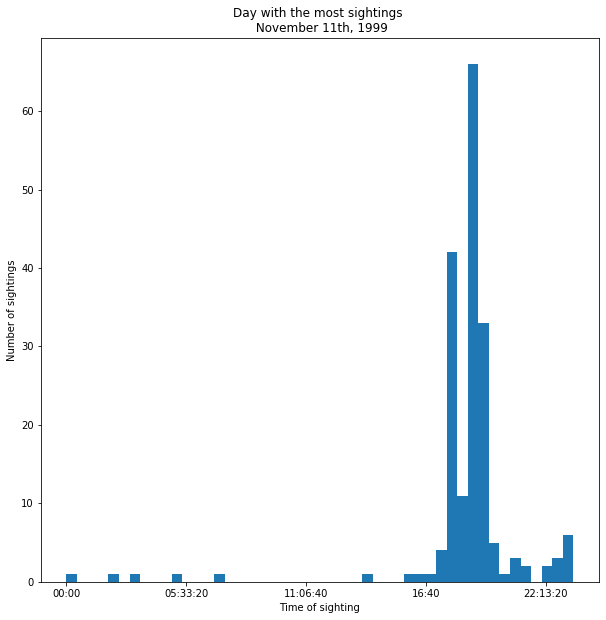

In [15]:
plt.figure(figsize=(10,10),edgecolor='blue')
plt.hist(most_sightings['TimeOfDay'], bins=48)
plt.title("Day with the most sightings \n November 11th, 1999")

plt.xlabel('Time of sighting')
plt.ylabel('Number of sightings');

Day with the second most sightings:

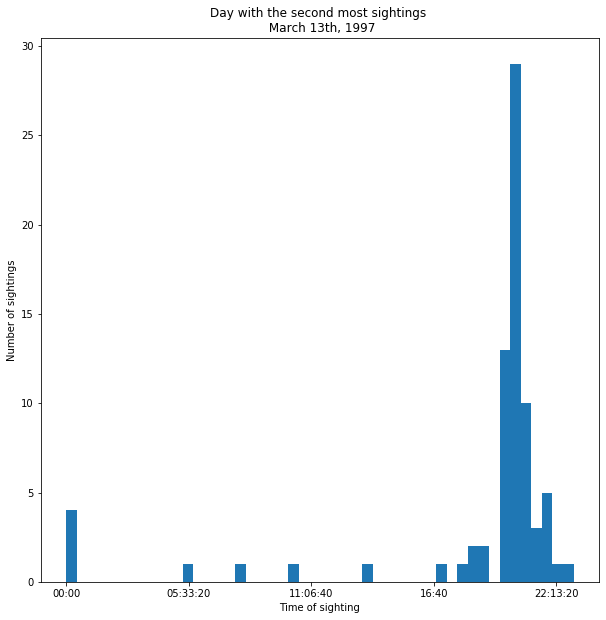

In [16]:
plt.figure(figsize=(10,10),edgecolor='blue')
plt.hist(second_most_sightings['TimeOfDay'], bins=48)
plt.title('Day with the second most sightings \n March 13th, 1997')
plt.xlabel('Time of sighting')
plt.ylabel('Number of sightings');


Two days with the most sightings compared:

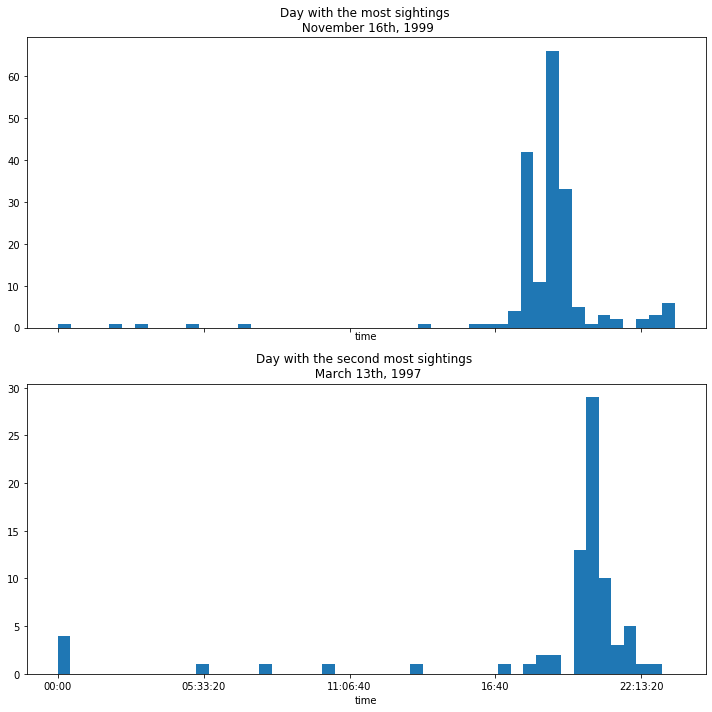

In [17]:
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize=(10,10))


axs[0].hist(most_sightings['TimeOfDay'], bins=48)
axs[0].set_title('Day with the most sightings \n November 16th, 1999')
axs[1].hist(second_most_sightings['TimeOfDay'], bins= 48)
axs[1].set_title('Day with the second most sightings \n March 13th, 1997');

### Looking for patterns in the UFO sightings

In [18]:
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time,Day,Date,TimeOfDay
count,18216,2882,15597,18241,18241,18241,18241,18241
unique,6476,27,27,52,16145,7,5576,834
top,Seattle,RED,LIGHT,CA,1999-11-16 19:00:00,Tuesday,1999-11-16,22:00:00
freq,187,780,2803,2529,27,2822,187,1293
first,NaN,NaN,NaN,NaN,1930-06-01 22:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2000-12-31 23:59:00,NaN,NaN,NaN


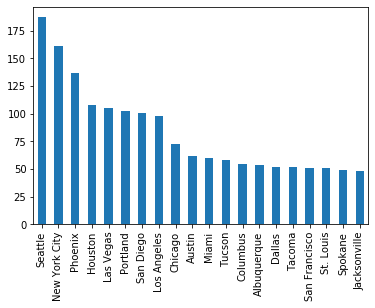

In [19]:
ufo['City'].value_counts().sort_values(ascending=False)[:20].plot(kind = 'bar');

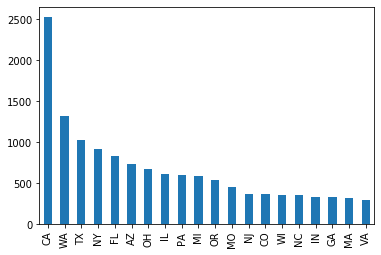

In [20]:
ufo['State'].value_counts().sort_values(ascending=False)[:20].plot(kind = 'bar');

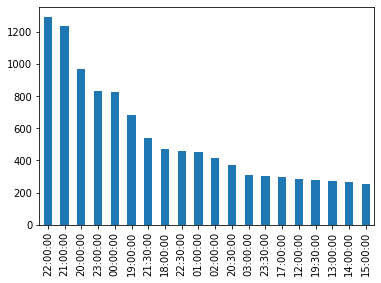

In [21]:
ufo['TimeOfDay'].value_counts().sort_values(ascending=False)[:20].plot(kind = 'bar');

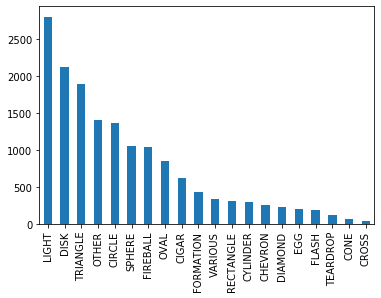

In [22]:
ufo['Shape Reported'].value_counts().sort_values(ascending=False)[:20].plot(kind= 'bar');

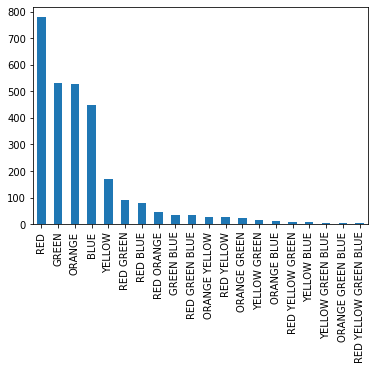

In [23]:
ufo['Colors Reported'].value_counts().sort_values(ascending=False)[:20].plot(kind= 'bar');

In [24]:
list(ufo['Colors Reported'].value_counts().sort_values(ascending=False).index)

['RED',
 'GREEN',
 'ORANGE',
 'BLUE',
 'YELLOW',
 'RED GREEN',
 'RED BLUE',
 'RED ORANGE',
 'GREEN BLUE',
 'RED GREEN BLUE',
 'ORANGE YELLOW',
 'RED YELLOW',
 'ORANGE GREEN',
 'YELLOW GREEN',
 'ORANGE BLUE',
 'RED YELLOW GREEN',
 'YELLOW BLUE',
 'YELLOW GREEN BLUE',
 'ORANGE GREEN BLUE',
 'RED YELLOW GREEN BLUE',
 'RED ORANGE YELLOW',
 'RED ORANGE BLUE',
 'RED ORANGE GREEN',
 'RED YELLOW BLUE',
 'ORANGE YELLOW GREEN',
 'ORANGE YELLOW BLUE',
 'RED ORANGE YELLOW BLUE']

In [83]:
times = ufo['TimeOfDay'].value_counts().index
sightings = [i for i in ufo['TimeOfDay'].value_counts()]
ufo_times = pd.DataFrame() 
ufo_times['times'] = times
ufo_times['sightings'] = sightings
ufo_times.sort_values(by='times', inplace=True)

In [100]:
def read_year(x):
    return x[:4]

ufo['Year'] = ufo['Date'].map(read_year)

In [101]:
ufo['Year']

0        1930
1        1930
2        1931
3        1931
4        1933
         ... 
18236    2000
18237    2000
18238    2000
18239    2000
18240    2000
Name: Year, Length: 18241, dtype: object

In [102]:
years = ufo['Year'].value_counts().index
sightings = [i for i in ufo['Year'].value_counts()]
ufo_years = pd.DataFrame() 
ufo_years['years'] = years
ufo_years['sightings'] = sightings
ufo_years.sort_values(by='years', inplace=True)

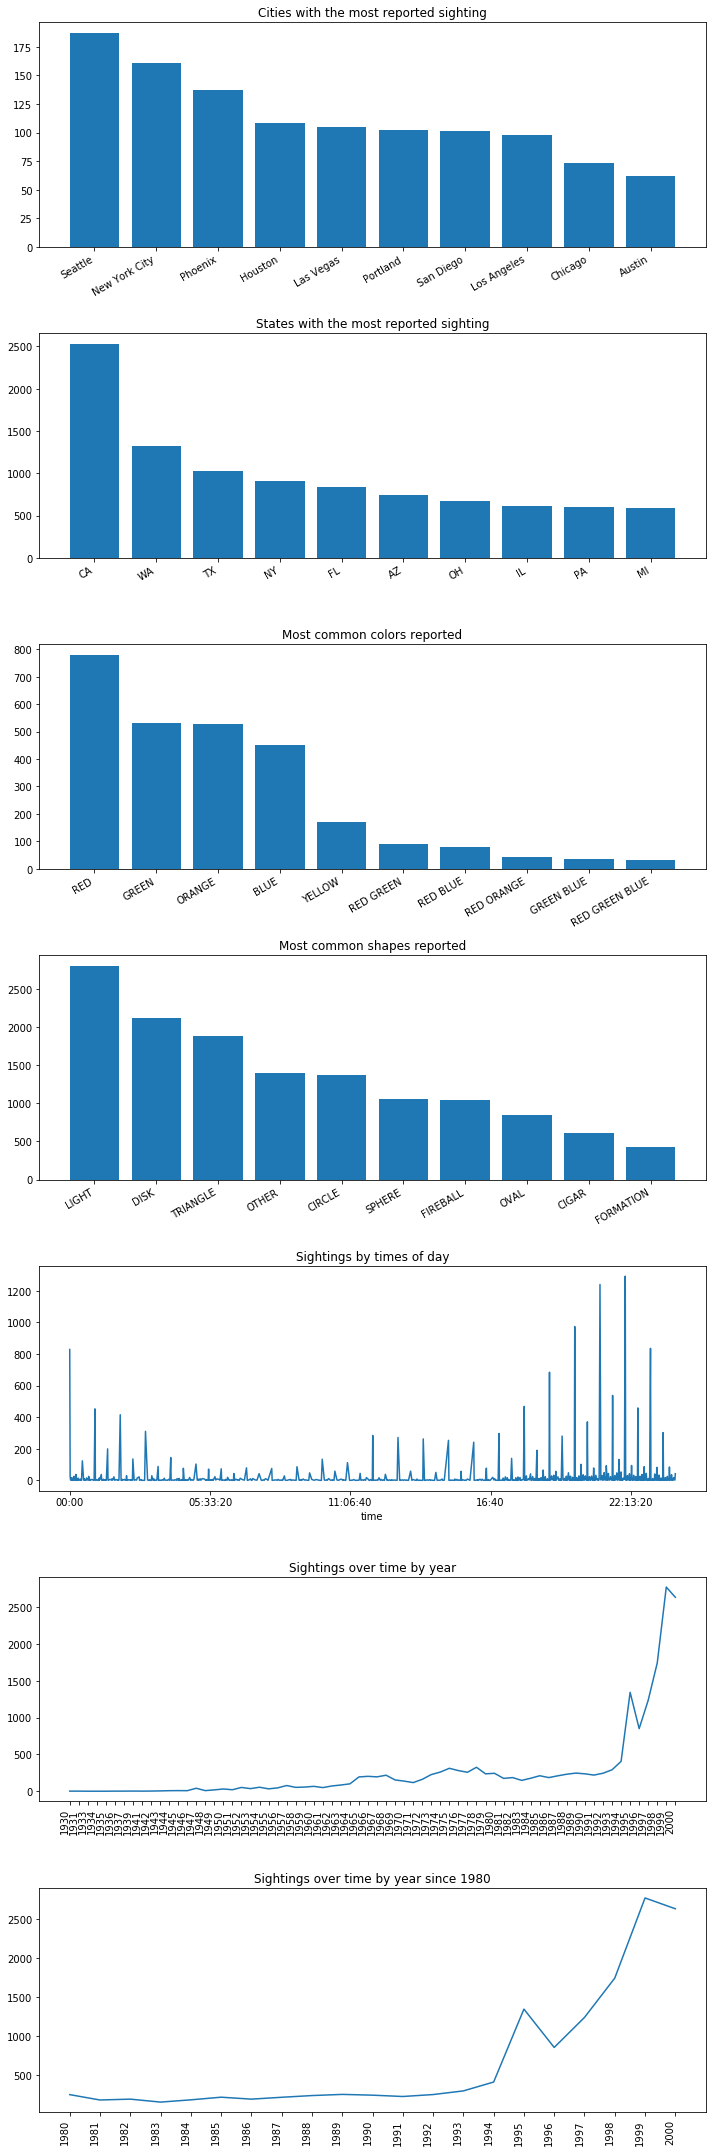

In [113]:
fig, axs = plt.subplots(7, 1, tight_layout=True, figsize=(10,30))

axs[0].bar(ufo['City'].value_counts().sort_values(ascending=False).index[:10], 
           ufo['City'].value_counts().sort_values(ascending=False)[:10])
axs[0].set_title('Cities with the most reported sighting')
plt.setp(axs[0].get_xticklabels(), rotation=30, horizontalalignment='right')

axs[1].bar(ufo['State'].value_counts().sort_values(ascending=False).index[:10], 
           ufo['State'].value_counts().sort_values(ascending=False)[:10])
axs[1].set_title('States with the most reported sighting')
plt.setp(axs[1].get_xticklabels(), rotation=30, horizontalalignment='right')


axs[2].bar(ufo['Colors Reported'].value_counts().sort_values(ascending=False).index[:10], 
           ufo['Colors Reported'].value_counts().sort_values(ascending=False)[:10])
axs[2].set_title('Most common colors reported')
plt.setp(axs[2].get_xticklabels(), rotation=30, horizontalalignment='right');

axs[3].bar(ufo['Shape Reported'].value_counts().sort_values(ascending=False).index[:10], 
           ufo['Shape Reported'].value_counts().sort_values(ascending=False)[:10])
axs[3].set_title('Most common shapes reported')
plt.setp(axs[3].get_xticklabels(), rotation=30, horizontalalignment='right');

axs[4].plot(ufo_times['times'], ufo_times['sightings'])
axs[4].set_title('Sightings by times of day');

axs[5].plot(ufo_years['years'], ufo_years['sightings'])
axs[5].set_title('Sightings over time by year');
plt.setp(axs[5].get_xticklabels(), rotation=90, horizontalalignment='right');

axs[6].plot(ufo_years['years'][-21:], ufo_years['sightings'][-21:])
axs[6].set_title('Sightings over time by year since 1980');
plt.setp(axs[6].get_xticklabels(), rotation=90, horizontalalignment='right');

Based on this exploration of the data using plots, UFO sightings have started to increase sharply since 1994. It is unclear if there is any bias in reporting. If there were not systems for reporting UFO sightings until recently, the spike might not be an indication of increased sightings. Additionally, all of this is gross numbers and doesn't account for changes in population. A per capita treatment would be helpful for better understanding trends in these data. 

The most common UFO reported is a red light or disk. Other common colors reported are green, orange, and blue. Triangles are the most common shape after light and disk. 

Sightings are more frequently reported at night time, increasing after 5pm and peaking around 10pm.

Seattle has the most reported sightings with 187 but 6476 cities reported sightings. California had the most sightings with 2529, but it is also 